In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [5]:
fixed = [False, True, False, False, True, False]

standard = jsm_mcmc.Chain("../../mcmc/inference_tests/mock_0/chain.h5", fixed=fixed, Nstack=500, Nburn=0, Nthin=2)

In [7]:
standard.blobs

array([(-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf, -inf),
       (-inf, -inf), (-inf, -inf), (-inf, -inf), (-inf,

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table
import galhalo
import os

from scipy import stats
from numpy.random import poisson
from scipy.stats import ks_2samp
import jsm_stats
import jsm_SHMR
import jsm_mcmc

In [3]:
wow = np.load("../../data/MW-analog/meta_data_psi4/jsm_MCMC.npy")
wowS = galhalo.lgMs_D22(np.vstack(wow))

In [4]:
hmm1 = jsm_stats.SatStats(wowS[0:10])
hmm1.CSMF()

hmm2 = jsm_stats.SatStats(wowS[200:300])
hmm2.CSMF()

hmm3 = jsm_stats.SatStats(wowS[1000:2000])
hmm3.CSMF()

hmm4 = jsm_stats.SatStats(wowS)
hmm4.CSMF()

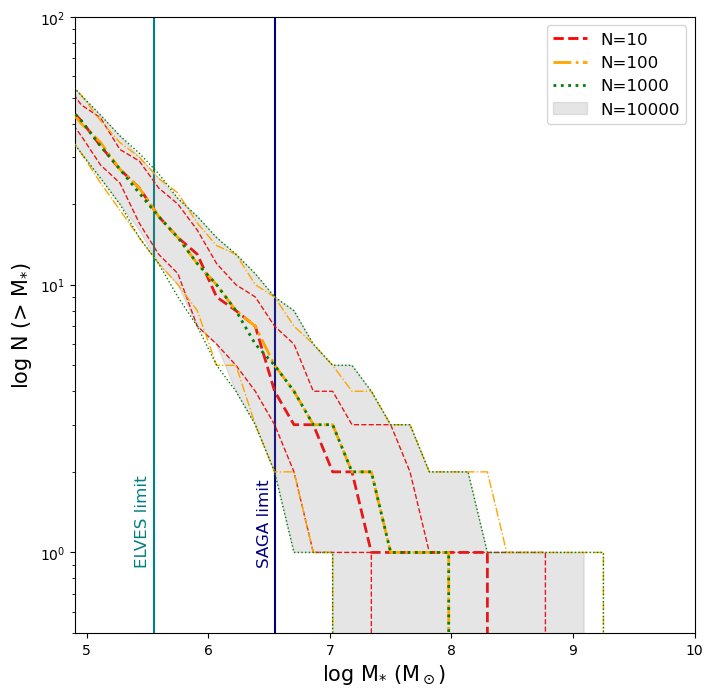

In [6]:
plt.figure(figsize=(8, 8))

plt.axvline(6.55, zorder=1, color="navy")
plt.text(6.4, 0.9, "SAGA limit", rotation=90, color="navy", fontsize=12)
plt.axvline(5.55, zorder=1, color="teal")
plt.text(5.4, 0.9, "ELVES limit", rotation=90, color="teal", fontsize=12)

plt.plot(hmm1.mass_bins, hmm1.quant[1], color="red", zorder=2, lw=2, ls="--", label="N=10")
plt.plot(hmm1.mass_bins, hmm1.quant[0], color="red", zorder=2, lw=1, ls="--")
plt.plot(hmm1.mass_bins, hmm1.quant[2], color="red", zorder=2, lw=1, ls="--")

plt.plot(hmm2.mass_bins, hmm2.quant[1], color="orange", zorder=3, lw=2, ls="-.", label="N=100")
plt.plot(hmm2.mass_bins, hmm2.quant[0], color="orange", zorder=3, lw=1, ls="-.")
plt.plot(hmm2.mass_bins, hmm2.quant[2], color="orange", zorder=3, lw=1, ls="-.")

plt.plot(hmm3.mass_bins, hmm3.quant[1], color="green", zorder=4, lw=2, ls=":", label="N=1000")
plt.plot(hmm3.mass_bins, hmm3.quant[0], color="green", zorder=4, lw=1, ls=":")
plt.plot(hmm3.mass_bins, hmm3.quant[2], color="green", zorder=4, lw=1, ls=":")

plt.fill_between(hmm4.mass_bins, y1=hmm4.quant[0], y2=hmm4.quant[2], alpha=0.2, color="grey", zorder=2, label="N=10000")

plt.legend(fontsize=12)
plt.yscale("log")
plt.xlabel("log M$_{*}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> M$_{*}$)", fontsize=15)
plt.xlim(4.9, 10)
plt.ylim(0.5,10**2)
plt.show()

In [ ]:
hmm = jsm_stats.SatStats(wowS[0:50])
hmm.CSMF()
hmm.plot_CSMF()

In [ ]:
data = mcmc_aux.mock_SAGA_survey([1.9,-0.2,0.6], SAGA_ind=0, file="../../data/MCMC/SAGA_samples_10k.npy")
data.get_stats(min_mass=6.5)

models = mcmc_aux.satgen_models([1.9,-0.2,0.6], data.lgMh, Nsamples=3)
models.get_stats(min_mass=6.5)

In [ ]:
plt.plot(np.arange(models.stat.Pnsat.shape[0]), models.stat.Pnsat)
plt.plot(np.arange(data.stat.Pnsat.shape[0]), data.stat.Pnsat)
plt.xlim(0,25)
plt.show()

In [ ]:
def lnL_Pnsat(model, data):
    return np.sum(np.log(model[data]))
lnL_Pnsat(models.stat.Pnsat, data.stat.satfreq)

In [ ]:
plt.plot(models.stat.Msmax, models.stat.ecdf_MsMax)
plt.plot(data.stat.Msmax, data.stat.ecdf_MsMax)

In [ ]:
def lnL_KS(model, data):
    return np.log(ks_2samp(model, data)[1])
lnL_KS(models.stat.Msmax, data.stat.Msmax)

In [ ]:
alphas = np.linspace(1.1,3,100)
deltas = np.linspace(-2,0.3,100)
sigmas = np.linspace(0,2,5)


lnL_M = []
lnL_N = []

for i in deltas:
    models = mcmc_aux.satgen_models([1.9,i,0], data.lgMh, Nsamples=3)
    try:
        models.get_stats(min_mass=6.5)
    except IndexError:
        print(i) 
#     lnL_M.append(lnL_KS(models.stat.Msmax, data.stat.Msmax))
#     lnL_N.append(lnL_Pnsat(models.stat.Pnsat, data.stat.satfreq))

# lnL_M = np.array(lnL_M)
# lnL_N = np.array(lnL_N)

# for i in alphas:
#     for j in deltas:
#         for k in sigmas:

- Start with 3000 MW host halos -
Choose 100 of them to be the mock SAGA data.Assume what the universe looks like (decide on theta_0)
Run the mock data through the SHMR.
Measure the Nsat and Msmax statistics across the 100 hosts. This is the data, it does not change.

- With the remaining of the 2900 MW hosts -
Explore new values of theta (theta_i).
Measure the Nsat and Msmax statistics across the 2900 hosts. For each Nsat vector in a model, count the frequency and divide by 2900 to get a probability.This is the model. It is smoother than the data and in principle should be made up of as many MW hosts as possible.By assigning each count in the data its corresponding probability in the model, we can measure a likelihood.

- in a single step of the chain (one realization of theta_i):
DATA ( n = 100 values)data_vec = [2, 3, 0, 1, ... ]
MODEL (n = 18 values: the maximum number of satellites across all 2900 hosts - n might change depending on theta_i)Pmodel_vec = [0.01, 0.02, 0.05, 0.06, ...] Pmodel_index = [0, 1, 2, 3, ...]
PROBABILITY (n = 100 regardless of theta_i)
P(Nsat)_vec = [0.05, 0.06, 0.01, 0.02, ... ]The first value in the resulting probability vector would be 0.05 since the data shows only 2 satellites (n=2 index).
The second value would be 0.06, since the data shows 3 satellites (n=3 index). The third value would be 0.01, since the data shows 0 satellites (n=0 index). etc.
ln LIKELIHOOD ln L = ln ( product ( [0.05, 0.06, 0.01, 0.02, ... ] ))ln L = -271.32
SPECIAL CASESfor a given value of theta_i, the model might not have corresponding probabilities.
Let's say that theta_i: alpha=1.3, delta=-0.1, sigma=0. (moderately steep up curve - lots of galaxies predicted above 10^6.5)

issue is the model doesnt always have probabilites for every index correspoinding to the count!

https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/#

https://github.com/vinyluis/Articles/blob/main/Kolmogorov-Smirnov/Kolmogorov-Smirnov.ipynb

follow the above notebook to write your own!

okay so in combination these two statistics - the PDF of the number of satellites more massive than 6.5 and the CDF of the stellar mass of the most massive satellite - already encompas the halo to halo variance! each one of the stats is per host! that means that plotting the distribution shows how much each SAGA sample of 100 hosts differs. now to measure the likelyhood and combine them!

https://www.statisticshowto.com/likelihood-function-definition/

In [ ]:
class satgen_models_Nsamp: 

    def __init__(self, SHMR, theta:list, lgMh):
        self.theta = theta
        self.lgMh = lgMh
        self.lgMs = SHMR(self.lgMh, theta)

    def get_stats(self, min_mass):
        self.min_mass = min_mass
        self.stat = jsm_stats.SatStats(self.lgMs)
        self.stat.Nsat(self.min_mass)
        self.stat.Maxmass()

In [ ]:
lgMh = np.load("../../data/MCMC/SAGA_samples_10k.npy")

In [ ]:
lgMh = np.vstack(lgMh)
lgMh.shape

In [ ]:
theta = [1.9, -0.2, 0.2]

In [ ]:
test = satgen_models_Nsamp(galhalo.SHMR_3D, theta, lgMh)

In [ ]:
test.lgMs.shape

In [ ]:
def forward(theta):
    models = satgen_models_Nsamp(theta, data.lgMh)
    models.get_stats(min_mass=6.5)
    return models.stat.Pnsat, models.stat.Msmax

In [ ]:
def SHMR_Nsigma(lgMh_2D, theta, Nsamples=3):

    """_summary_
    Convert from halo mass to stellar mass sampling sigma more than once!

    Args:
        lgMh_2D (np.ndarray): 2D halo mass array
        a1: power law slope
        a2: quadratic term to cruve relation
        a3: log normal scatter

    Returns:
        np.ndarray: 2D stellar mass array
    """

    M_star_a = 10 # these are the anchor points
    M_halo_a = 11.67

    lgMs_2D = theta[0]*(lgMh_2D-M_halo_a) + theta[1]*(lgMh_2D-M_halo_a)**2 + M_star_a
    scatter_3D = np.random.normal(loc=0, scale=theta[2], size=(Nsamples, lgMs_2D.shape[0], lgMs_2D.shape[1]))
    stack = scatter_3D + lgMs_2D[np.newaxis, :, :]
    return np.vstack(stack)

In [ ]:
lgMh = np.load("../../data/cross_host/test/jsm_MCMC.npy")

lgMs = jsm_SHMR.anchor([1.8, -0.2, 0.4, 10.1], np.vstack(lgMh))

In [ ]:
wow = jsm_stats.SatStats(lgMs)

wow.CSMF()
wow.plot_CSMF()

wow.Nsat(6.5, plot=True)

wow.Maxmass(plot=True)

### messing with the likelyhood

In [3]:
fid_theta = [1.8, -0.2, 0.4, 10.1]
priors = [[-5, 5],[-3, 1],[0, 5], [9,12]]
min_mass = 6.5

In [4]:
massdir = "../../data/MW-analog/meta_data_psi3/"
datadir = "../../data/init_val/testing/"
data = jsm_mcmc.test_data(fid_theta, massdir+"jsm_MCMC.npy", datadir+"data.npy")
data.get_stats(min_mass=min_mass)

In [5]:
def forward(theta):
    models = jsm_mcmc.models(theta, jsm_SHMR.anchor, data.lgMh_models)
    models.get_stats(min_mass=min_mass)
    return models.stat.Pnsat, models.stat.Msmax, models.stat.ecdf_MsMax

def lnlike(theta):
    model_Pnsat, models_Msmax, _ = forward(theta)
    lnL_sat = jsm_mcmc.lnL_Pnsat(model_Pnsat, data.stat.satfreq)
    lnL_max = jsm_mcmc.lnL_KS(models_Msmax, data.stat.Msmax)
    return lnL_sat + lnL_max

def lnprior(theta):
    if priors[0][0] < theta[0] < priors[0][1] and priors[1][0] < theta[1] < priors[1][1] and priors[2][0] < theta[2] < priors[2][1]:
        lp = 0
    else:
        lp = -np.inf
    chi2_pr = ((theta[3] - 10.0) / 0.2) ** 2
    lnLPR = -chi2_pr / 2.0
    return lnLPR + lp

def lnprob(alpha, delta, sigma, Mstar):
    theta = [alpha, delta, sigma, Mstar]
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    else:
        return lp + lnlike(theta)

In [6]:
def lnlikelystory(alpha, delta, sigma, Mstar):
    theta = [alpha, delta, sigma, Mstar]
    model_Pnsat, models_Msmax, _ = forward(theta)
    lnL_sat = jsm_mcmc.lnL_Pnsat(model_Pnsat, data.stat.satfreq)
    lnL_max = jsm_mcmc.lnL_KS(models_Msmax, data.stat.Msmax)
    return lnL_sat, lnL_max

In [7]:
alphas = np.linspace(-5, 5, 100)
lsa1 = []
lma1 = []
for i in alphas:
    ls_i, lm_i = lnlikelystory(i, 0, 0.1, 10)
    lsa1.append(ls_i)
    lma1.append(lm_i)

In [30]:
np.sum([np.log(0), np.log(0),np.log(0)])

-inf

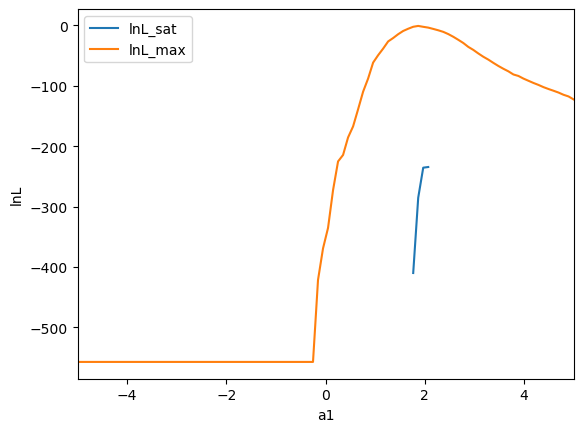

In [8]:
plt.plot(alphas, lsa1, label="lnL_sat")
plt.plot(alphas, lma1, label="lnL_max")
#plt.plot(alphas, np.array(lsa1)+np.array(lma1), label="total", color="black")
plt.ylabel("lnL")
plt.xlabel("a1")
plt.xlim(-5, 5)
plt.legend()
plt.show()

In [10]:
deltas = np.linspace(-3, 1, 100)
lsa2 = []
lma2 = []
for i in deltas:
    ls_i, lm_i = lnlikelystory(1.9, i, 0.1, 10)
    lsa2.append(ls_i)
    lma2.append(lm_i)

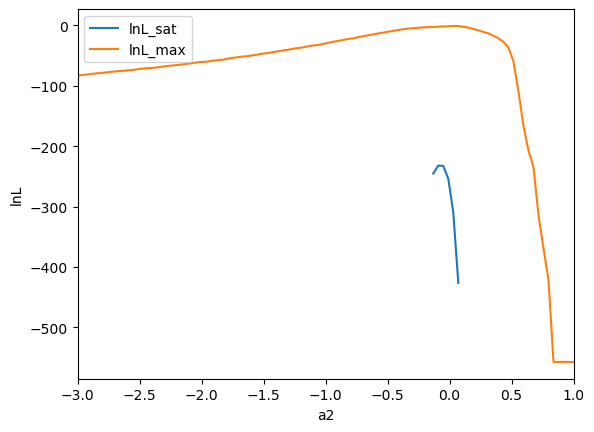

In [11]:
plt.plot(deltas, lsa2, label="lnL_sat")
plt.plot(deltas, lma2, label="lnL_max")
#plt.plot(deltas, lsa2+lma2, label="total", color="black")
plt.ylabel("lnL")
plt.xlabel("a2")
plt.xlim(-3, 1)
plt.legend()
plt.show()

In [16]:
sigmas = np.linspace(0.1, 8, 100)
lsa3 = []
lma3 = []
for i in sigmas:
    ls_i, lm_i = lnlikelystory(1.9, 0, i, 10)
    lsa3.append(ls_i)
    lma3.append(lm_i)

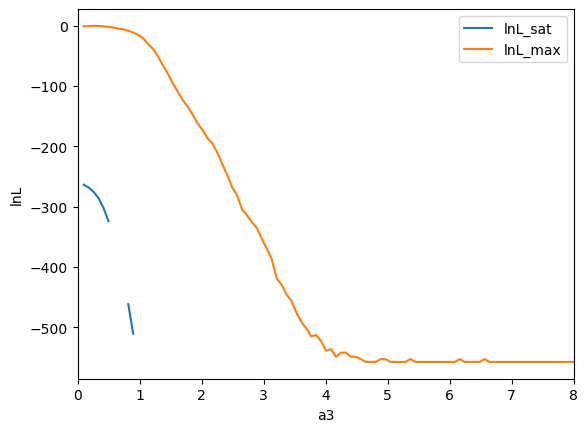

In [18]:
plt.plot(sigmas, lsa3, label="lnL_sat")
plt.plot(sigmas, lma3, label="lnL_max")
#plt.plot(sigmas, lsa3+lma3, label="total", color="black")
plt.ylabel("lnL")
plt.xlabel("a3")
plt.xlim(0, 8)
plt.legend()
plt.show()

### looking over the host properties

In [3]:
wow = np.load("../../data/cross_host/pull_try/host_properties.npy")

In [39]:
max(wow[:,0]) - 9

5.1973248000000005

(array([  29.,  241.,  826., 1771., 2063., 1768., 1452.,  870.,  487.,
         304.,  117.,   48.,   13.,    6.,    5.]),
 array([11.6889629 , 11.85618703, 12.02341115, 12.19063528, 12.35785941,
        12.52508353, 12.69230766, 12.85953179, 13.02675591, 13.19398004,
        13.36120417, 13.52842829, 13.69565242, 13.86287655, 14.03010067,
        14.1973248 ]),
 <BarContainer object of 15 artists>)

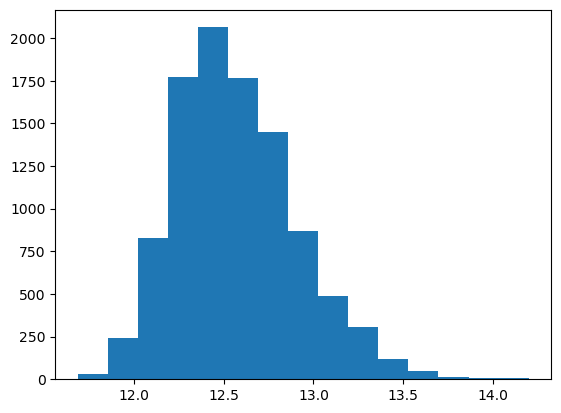

In [34]:
plt.hist(wow[:,0], bins=15)

(array([ 193.,  606.,  904., 1432., 1455., 1522., 1396., 1025.,  659.,
         446.,  250.,   86.,   21.,    3.,    2.]),
 array([0.01739875, 0.20785825, 0.39831776, 0.58877726, 0.77923677,
        0.96969627, 1.16015578, 1.35061529, 1.54107479, 1.7315343 ,
        1.9219938 , 2.11245331, 2.30291281, 2.49337232, 2.68383182,
        2.87429133]),
 <BarContainer object of 15 artists>)

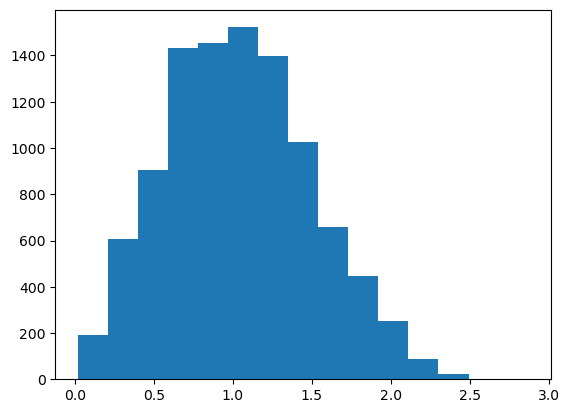

In [35]:
plt.hist(wow[:,1], bins=15)

(array([  24.,  124.,  387.,  759., 1360., 1575., 1609., 1480., 1115.,
         764.,  393.,  229.,  117.,   54.,   10.]),
 array([0.64752778, 1.01409688, 1.38066599, 1.7472351 , 2.1138042 ,
        2.48037331, 2.84694242, 3.21351153, 3.58008063, 3.94664974,
        4.31321885, 4.67978795, 5.04635706, 5.41292617, 5.77949528,
        6.14606438]),
 <BarContainer object of 15 artists>)

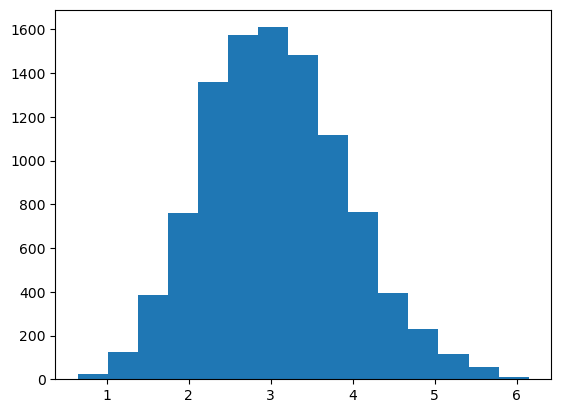

In [36]:
plt.hist(wow[:,2], bins=15)

24637.0

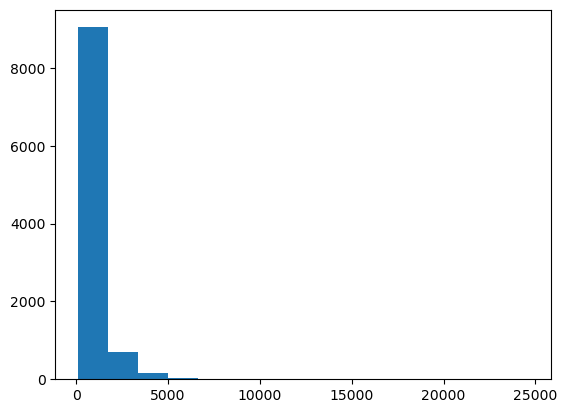

In [5]:
plt.hist(wow[:,3], bins=15)
max(wow[:,3])

In [6]:
max(wow[:,3])

24637.0

In [ ]:
# plt.scatter(data.stat.Msmax, data.stat.satfreq)
# plt.grid()
# models = jsm_mcmc.models(fid_theta, jsm_SHMR.anchor, data.lgMh_models)
# models.get_stats(min_mass=6.5)
# pixels = 20
# binM = np.linspace(6,11,pixels)

# binN = np.linspace(0,pixels,pixels)

# bincentersM = 0.5 * (binM[1:] + binM[:-1])
# bincentersN = 0.5 * (binN[1:] + binN[:-1])
# hist2d, xedges, yedges = np.histogram2d(models.stat.Msmax, models.stat.satfreq, (binM, binN))
# image = np.rot90(hist2d)
# fig,ax=plt.subplots(figsize=(8,8))
# im = ax.imshow(image, extent=[bincentersM.min(), bincentersM.max(), bincentersN.min(), bincentersN.max()])
# ax.set_aspect(1/ax.get_data_ratio(), adjustable="box")
# plt.scatter(data.stat.Msmax, data.stat.satfreq, color="white", marker=".")
# plt.ylabel("N satellites")
# plt.xlabel("log Ms max")
# fig.colorbar(im)
# plt.show()

In [ ]:

# def lnprior(theta):
#     chi2_pr = ((theta[2] - 10.5) / 0.2) ** 2
#     lnp = -chi2_pr / 2.0

#     if theta[3] > 0:
#         zero_p = 12 - theta[0]/(2*theta[3])
#         if zero_p < 9.0:
#             lncurve = 0.0
#         else:
#             lncurve = -np.inf
#     elif theta[3] <= 0:
#         lncurve = 0.0

#     if priors[0][0] < theta[0] < priors[0][1] and\
#         priors[1][0] < theta[1] < priors[1][1] and\
#          priors[2][0] < theta[2] < priors[2][1] and\
#         priors[1][0] <= theta[1] < priors[1][1] and\
#           priors[3][0] < theta[3] < priors[3][1]:
#         lp = 0.0
#         lnflat = 0.0
#     else:
#         lp = -np.inf
#     return lp
#         lnflat = -np.inf

#     return lnp + lnflat + lncurve